In [2]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database, drop_database
import matplotlib.pyplot as plt

In [3]:
sns.set_style('whitegrid')

In [4]:
with open('pg_credentials.p', 'rb') as f:
    pg_credentials = pickle.load(f)

In [5]:
host     = 'localhost'
db_name  = 'goodreads_db'
username = pg_credentials['username']
password = pg_credentials['password']
port = '5432'  # default port that postgres listens on
    
con = psycopg2.connect(database = db_name, user = username, host=host, password=password)

In [6]:
query = "SELECT shelf, SUM(nshelves) AS total FROM shelves GROUP BY shelf;"
shelf_data = pd.read_sql_query(query, con)

In [7]:
shelf_data = shelf_data.sort_values(by='total', ascending=False)

In [8]:
shelf_data

,shelf,total
4035,to-read,101942795.0
8620,currently-reading,5565426.0
2076,fantasy,3929270.0
1990,favorites,2554506.0
1925,fiction,1632708.0
...,...,...
7170,dnu,-1.0
6130,e-arc-entry,-1.0
998,hugo-or-nebula,-2.0
2928,hugo-toberead,-2.0


In [9]:
print(shelf_data.iloc[0:30])

                  shelf        total
4035            to-read  101942795.0
8620  currently-reading    5565426.0
2076            fantasy    3929270.0
1990          favorites    2554506.0
1925            fiction    1632708.0
1832        young-adult    1281745.0
6793    science-fiction    1186720.0
7330             sci-fi     937396.0
254                 own     795755.0
5199              owned     739212.0
6019        books-i-own     691350.0
256                  ya     588724.0
4119           classics     554573.0
6856             series     432891.0
684              horror     343199.0
7676            romance     336416.0
1906          dystopian     331587.0
8585               2018     293184.0
3568           dystopia     287003.0
5221               2017     277085.0
7424               2016     258389.0
7257         favourites     257861.0
7721          audiobook     223175.0
6012               2015     222661.0
2660         paranormal     206832.0
227                2019     206227.0
7

In [10]:
print(shelf_data.iloc[30:60])

                   shelf     total
1115               scifi  192825.0
6849      sci-fi-fantasy  189666.0
4890          audiobooks  181352.0
3183             library  176302.0
2196            wishlist  174479.0
3069               magic  171794.0
8088       urban-fantasy  157590.0
3339             default  155483.0
5733                2013  149977.0
2390              to-buy  144664.0
6066               ebook  137439.0
7846            vampires  116391.0
808                audio  112250.0
82                  2012  111368.0
3883            my-books  111112.0
2415        stephen-king  108792.0
4607             mystery  104526.0
695               novels  103842.0
2232           childrens  103462.0
6226               adult   99103.0
6678             classic   99072.0
8004      fantasy-sci-fi   95757.0
5721  historical-fiction   95713.0
3959           book-club   90942.0
8095              ebooks   86935.0
3653                  sf   86357.0
3897             re-read   84373.0
4631          my-lib

In [11]:
print(shelf_data.iloc[60:90])

                   shelf    total
5476               i-own  79878.0
2735          ya-fantasy  78245.0
7388        supernatural  77766.0
8047        harry-potter  73016.0
3334            thriller  71962.0
5652        high-fantasy  71864.0
5670                2011  71687.0
3715       scifi-fantasy  70802.0
6052            children  70061.0
3935                teen  69999.0
6023           mythology  68188.0
2325               humor  68137.0
496         middle-grade  64674.0
1180  all-time-favorites  63099.0
663         read-in-2018  61755.0
4594             5-stars  60545.0
1547        read-in-2017  60469.0
6840        read-in-2016  60180.0
4616        epic-fantasy  59799.0
3820             audible  59309.0
6983              comics  58022.0
623                books  57115.0
3292        read-in-2015  56984.0
3171                 tbr  55230.0
2925           wish-list  52954.0
7956          literature  51114.0
913       favorite-books  50799.0
2131           discworld  50760.0
4298        re

In [12]:
print(shelf_data.iloc[90:120])

                        shelf    total
8310                abandoned  49687.0
5707               ya-fiction  48717.0
5049         post-apocalyptic  48491.0
7331           did-not-finish  47797.0
5829                  english  47237.0
1965                 favorite  47227.0
4165            adult-fiction  47171.0
55                      novel  46089.0
3510                childhood  44881.0
3831      speculative-fiction  44074.0
2192                star-wars  42754.0
5458                     2010  41332.0
7441       paranormal-romance  40655.0
7611            short-stories  40380.0
2578                  vampire  39792.0
7839             contemporary  39244.0
2872              time-travel  39164.0
191   science-fiction-fantasy  39061.0
7799            graphic-novel  38787.0
7204              audio-books  37546.0
583                    own-it  36924.0
8587                steampunk  36629.0
6727               historical  36397.0
1552                   reread  36375.0
2066             read-in-

In [13]:
print(shelf_data.iloc[120:150])

                    shelf    total
5964  young-adult-fiction  29550.0
8471              dragons  29445.0
5400         read-in-2019  28582.0
7413                maybe  27468.0
3475         read-in-2012  27165.0
7462           audio-book  27159.0
379                e-book  26996.0
4034            bookshelf  26627.0
4676               humour  25705.0
6772            read-2017  24895.0
1284            read-2018  24725.0
21                 school  24423.0
1332        fantasy-scifi  24250.0
1018              science  24064.0
6629           retellings  23745.0
5475              4-stars  23742.0
3725             reviewed  23533.0
6729               aliens  23501.0
2768                  sff  23054.0
7820              british  23041.0
2803                 2009  22733.0
5396                 lgbt  22627.0
155                 faves  22220.0
5350         rick-riordan  22077.0
1616          fairy-tales  22051.0
1690      terry-pratchett  21756.0
5613               angels  21415.0
8029                

In [14]:
print(shelf_data.iloc[150:180])

                    shelf    total
4458         my-bookshelf  19616.0
140             new-adult  19063.0
3385      read-in-english  18883.0
7568           werewolves  18788.0
2208            read-2015  18719.0
7149             suspense  18655.0
4570            cyberpunk  18356.0
106               e-books  17986.0
5834               comedy  17885.0
5649      childrens-books  17821.0
6896                  war  17282.0
5093                 epic  17165.0
7431      magical-realism  16902.0
449              ya-books  16898.0
4057                 king  16806.0
293    sci-fi-and-fantasy  16725.0
562            1001-books  16614.0
3617      favorite-series  16526.0
6509              witches  16149.0
2178             american  15993.0
5195            read-2014  15982.0
802          20th-century  15945.0
4389           2018-reads  15517.0
8025                crime  15438.0
1888         read-in-2011  15392.0
4731         my-favorites  15385.0
1593                lgbtq  15092.0
4108             juv

In [15]:
print(shelf_data.iloc[180:210])

                    shelf    total
7942             borrowed  14568.0
3582      cassandra-clare  14512.0
4705        percy-jackson  14436.0
2454            pratchett  14396.0
28                  funny  14349.0
3641                  fae  13840.0
7024          non-fiction  13349.0
6515              on-hold  13289.0
3496           philosophy  13277.0
2607           sf-fantasy  13143.0
8679              zombies  13092.0
5661           futuristic  12643.0
6240           unfinished  12589.0
6220          j-k-rowling  12459.0
549      literary-fiction  12420.0
6923          apocalyptic  12400.0
6637           kids-books  12252.0
999         wheel-of-time  12172.0
4449           2017-reads  12105.0
6667        love-triangle  11962.0
4881               ya-lit  11889.0
7561               gothic  11878.0
6613            owned-tbr  11773.0
1810            read-2019  11532.0
8469        coming-of-age  11510.0
3468           2016-reads  11478.0
5711      first-in-series  11469.0
7535  read-more-than

In [16]:
print(shelf_data.iloc[210:250])

                      shelf    total
2749               survival  10829.0
8570              read-2013  10826.0
5591       action-adventure  10734.0
5131                  youth  10630.0
7883                   favs  10581.0
6488              retelling  10285.0
8430              must-read  10195.0
2886                   1001  10023.0
270              fairy-tale   9912.0
1932     classic-literature   9907.0
6781             2019-reads   9859.0
3038                 demons   9834.0
8628                tolkien   9798.0
6397       mystery-thriller   9574.0
2360                  drama   9387.0
8337        read-for-school   9247.0
7596          female-author   9192.0
4221           read-in-2010   9182.0
2879      alternate-history   9090.0
2591          genre-fantasy   9077.0
4243               twilight   9031.0
537             high-school   9016.0
2291  comics-graphic-novels   8783.0
4748            neil-gaiman   8778.0
5568  children-s-literature   8712.0
5073               religion   8703.0
4

In [17]:
query = "SELECT rating, nratings, nreviews, to_read, favs, dnf FROM works"
numerical_data = pd.read_sql_query(query, con)

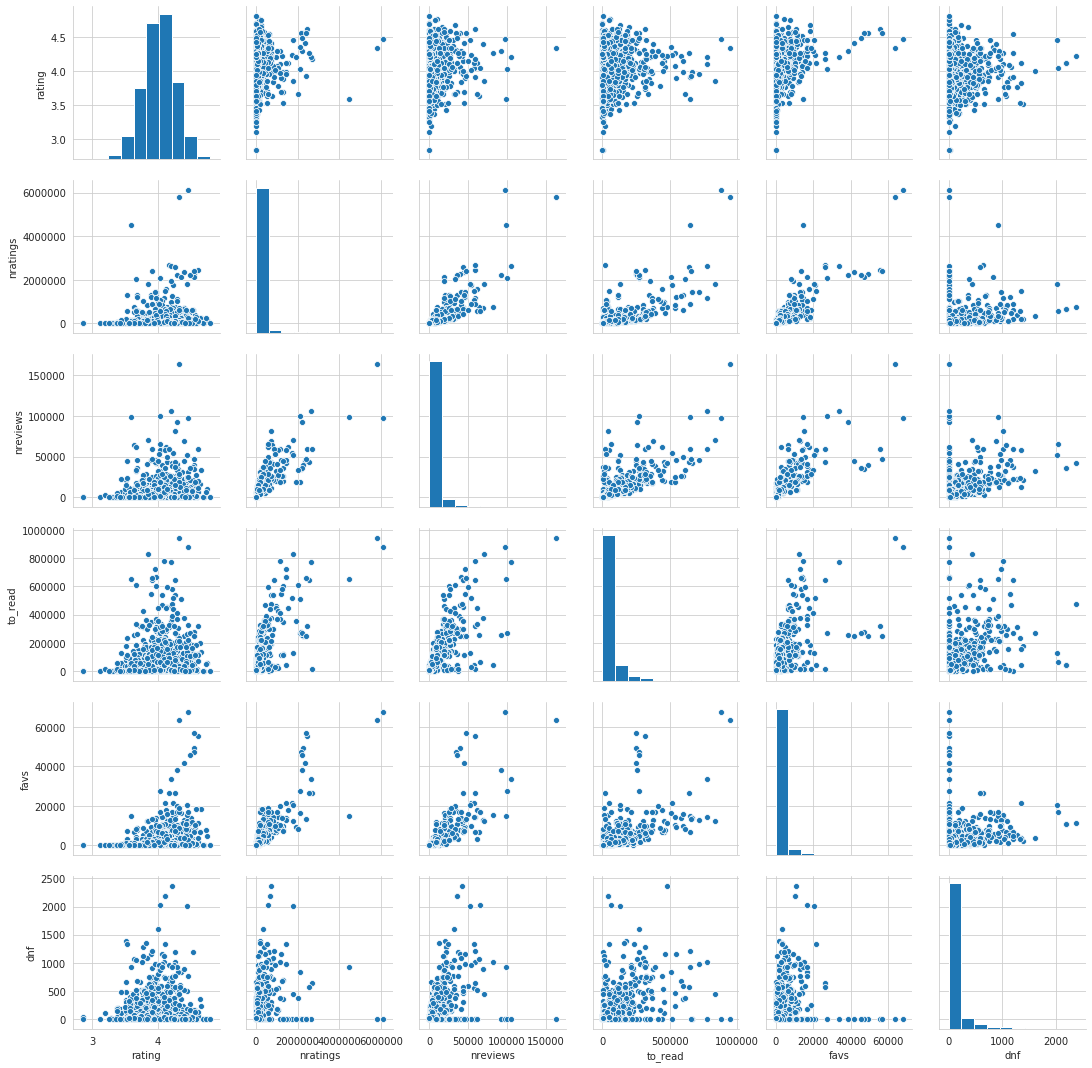

In [18]:
sns.pairplot(numerical_data)

Text(0.5, 0, 'log10(nratings)')

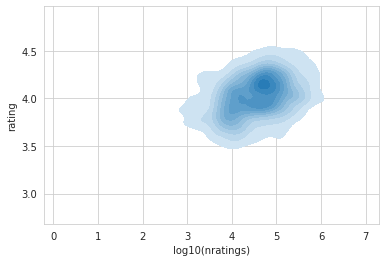

In [19]:
sns.kdeplot(np.log10(numerical_data['nratings']), numerical_data['rating'], shade=True, shade_lowest=False)
plt.xlabel("log10(nratings)")

Text(0.5, 0, 'log10(nratings)')

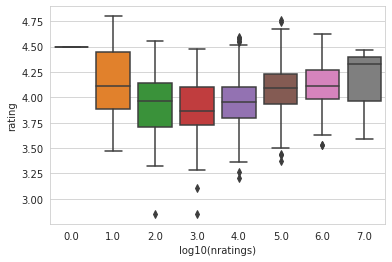

In [20]:
sns.boxplot(np.round(np.log10(numerical_data['nratings'])), numerical_data['rating'])
plt.xlabel("log10(nratings)")

Text(0.5, 0, 'log10(nratings)')

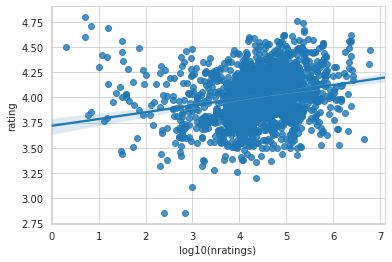

In [21]:
sns.regplot(np.log10(numerical_data['nratings']), numerical_data['rating'])
plt.xlabel("log10(nratings)")

Text(0.5, 0, 'log(nratings)')

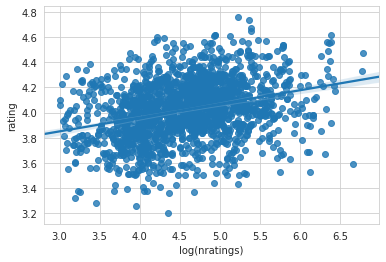

In [22]:
mask = np.log10(numerical_data['nratings'])>3
sns.regplot(np.log10(numerical_data['nratings'][mask]), numerical_data['rating'][mask])
plt.xlabel("log(nratings)")

In [23]:
query = "SELECT pubyear, nratings FROM works WHERE pubyear>2000"
pub_year_data = pd.read_sql_query(query, con)

Text(0, 0.5, 'log10(nratings)')

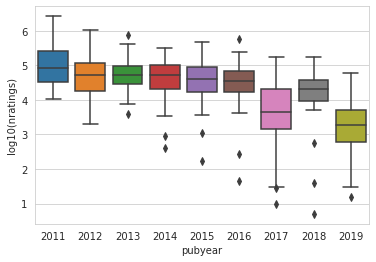

In [24]:
mask = pub_year_data['pubyear'] > 2010
sns.boxplot(pub_year_data['pubyear'][mask].astype(int), np.log10(pub_year_data['nratings'][mask]))
plt.xlim((plt.gca().get_xlim()[0], plt.gca().get_xlim()[1]-1))
plt.ylabel("log10(nratings)")

In [25]:
x = pub_year_data['pubyear']
y = np.log10(pub_year_data['nratings'])

Text(0, 0.5, 'log10(nratings)')

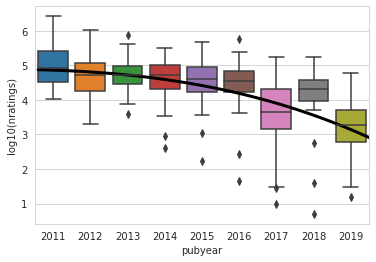

In [26]:
from numpy.polynomial import Polynomial
p = Polynomial.fit(x, y, 4)
sns.boxplot(pub_year_data['pubyear'][mask].astype(int), np.log10(pub_year_data['nratings'][mask]))
xp, yp = p.linspace()
maskp = xp>2010.5
xp -= 2011
plt.plot(xp[maskp], yp[maskp], color='black', lw=3)
plt.xlim((plt.gca().get_xlim()[0], plt.gca().get_xlim()[1]-1))
plt.ylabel("log10(nratings)")

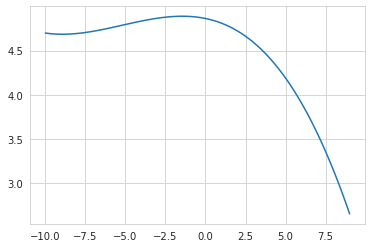

In [27]:
plt.plot(xp, yp)

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [29]:
query = ("SELECT nratings, fantasy, sf, horror, dystopian, romance, adventure, "+
         "urban_fantasy, mystery, historical,"+
         "high_fantasy, mythology, humor, literature, time_travel, space, id FROM works")
genre_data = pd.read_sql_query(query, con)
ids = genre_data.pop('id')

In [30]:
genre_data_rescaled = np.array(genre_data.values, dtype=float)

In [31]:
print(type(genre_data_rescaled))
genre_data_rescaled /= genre_data_rescaled[:, 0].T[:, None]
genre_data_rescaled = genre_data_rescaled[:, 1:]
genre_data_rescaled[np.isinf(genre_data_rescaled)] = 0
genre_data_rescaled[np.isnan(genre_data_rescaled)] = 0

<class 'numpy.ndarray'>


In [32]:
if False:
    mms = MinMaxScaler()
    mms.fit(genre_data_rescaled)
    with open('genre_rescaler.p', 'wb') as f:
        pickle.dump(mms, f)
else:
    with open('genre_rescaler.p', 'rb') as f:
        mms = pickle.load(f)
data_transformed = mms.transform(genre_data_rescaled)


In [33]:
size_of_clusters=[1]
min_size = int(0.03*len(data_transformed))

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from collections import Counter

model = None
masked_data = data_transformed

if False:
    while np.min(size_of_clusters)<min_size:
        if model is not None:
            remove_clusters = [i for i, c in enumerate(size_of_clusters) if c<min_size]
            print("Starting len", len(masked_data), "removing", len(remove_clusters), "clusters")
            for i in remove_clusters:
                mask = labels!=i
                labels = labels[mask]
                masked_data = masked_data[mask]
                ids = ids[mask]
            print("Ending len", len(masked_data))
            min_size = int(0.03*len(masked_data))

        # Instantiate the clustering model and visualizer
        model = KMeans()
        visualizer = KElbowVisualizer(model, k=(4,24))

        visualizer.fit(masked_data)        # Fit the data to the visualizer
        visualizer.poof()        # Draw/show/poof the data
        ngenres = visualizer.elbow_value_

        model = KMeans(ngenres)
        visualizer = InterclusterDistance(model)

        visualizer.fit(masked_data)        # Fit the data to the visualizer
        visualizer.poof()

        labels = model.predict(masked_data)
        label_counter = Counter(labels)
        size_of_clusters = [label_counter[i] for i in range(ngenres)]


In [36]:
ngenres = 10#visualizer.k_elbow_

if False:
    model = KMeans(ngenres)
    visualizer = InterclusterDistance(model)

    visualizer.fit(masked_data)        # Fit the data to the visualizer
    visualizer.poof()
    with open('genre_classifier.p', 'wb') as f:
        pickle.dump(model, f)
else:
    with open('genre_classifier.p', 'rb') as f:
        model = pickle.load(f)
    #visualizer = InterclusterDistance(model)
    #visualizer.poof()

labels = model.predict(masked_data)

In [37]:
query = ("SELECT id, title, author FROM works")
title_data = pd.read_sql_query(query, con)


In [38]:
title_data['prettystring'] = title_data.apply(lambda x: '{} by {}'.format(x.title, x.author), axis=1)
title_data = title_data[title_data['id'].isin(ids)]

In [39]:
for label in range(ngenres):
    print(f"Group {label}")
    mask = labels==label
    print(title_data['prettystring'][mask])

Group 0
21                         The Anubis Gates by Tim Powers
35      An Alchemy of Masques and Mirrors by Curtis Cr...
42      Mockingbird Vol. 2: My Feminist Agenda by Chel...
43                Red Seas Under Red Skies by Scott Lynch
47                          Leviathan by Scott Westerfeld
                              ...                        
1834                  A Confusion of Princes by Garth Nix
1838      The Woman Who Rides Like a Man by Tamora Pierce
1840                       Spill Zone by Scott Westerfeld
1849                     Idle Ingredients by Matt Wallace
1858    I Hate Fairyland, Vol. 3: Good Girl by Skottie...
Name: prettystring, Length: 171, dtype: object
Group 1
3       Lives of the Musicians: Good Times, Bad Times ...
6                 2061: Odyssey Three by Arthur C. Clarke
13      The Science Fiction Hall of Fame: Volume One, ...
16                       The Kraken Wakes by John Wyndham
17                       Fantastic Voyage by Isaac Asimov
         

In [40]:
centroids = model.cluster_centers_
genres = np.array([g for g in genre_data][1:])
with open('genre_defs.txt', 'w') as f:
    for i, centroid in enumerate(centroids):
        f.write(f"Group {i}\n")
        print(f"Group {i}")
        order = np.argsort(centroid)[::-1]
        for j, (g, c) in enumerate(zip(genres[order], centroid[order])):
            if j>4:
                continue
            print(f"{g}: {c:.3f}")
            f.write(f"{g}: {c:.3f}\n")

Group 0
adventure: 0.040
fantasy: 0.009
romance: 0.005
urban_fantasy: 0.003
high_fantasy: 0.003
Group 1
sf: 0.011
space: 0.003
fantasy: 0.003
adventure: 0.003
dystopian: 0.001
Group 2
dystopian: 0.021
sf: 0.009
adventure: 0.005
romance: 0.004
fantasy: 0.003
Group 3
mystery: 0.014
horror: 0.010
urban_fantasy: 0.004
adventure: 0.004
fantasy: 0.003
Group 4
romance: 0.054
adventure: 0.010
fantasy: 0.007
dystopian: 0.007
urban_fantasy: 0.004
Group 5
space: 0.023
sf: 0.014
adventure: 0.009
fantasy: 0.002
mystery: 0.001
Group 6
romance: 0.025
fantasy: 0.008
adventure: 0.006
urban_fantasy: 0.006
dystopian: 0.003
Group 7
high_fantasy: 0.016
fantasy: 0.015
adventure: 0.009
romance: 0.002
mystery: 0.001
Group 8
romance: 0.038
adventure: 0.028
fantasy: 0.011
high_fantasy: 0.010
dystopian: 0.006
Group 9
adventure: 0.014
fantasy: 0.006
sf: 0.003
romance: 0.002
dystopian: 0.002


In [41]:
query = ("SELECT * FROM works")
all_data = pd.read_sql_query(query, con)

In [42]:
import scipy.spatial.distance
distances = {}
for i, genre in enumerate(centroids):
    distances['genre{}'.format(i)] = [scipy.spatial.distance.cosine(book, genre) for book in data_transformed]



In [43]:
len(all_data), len(distances['genre0'])

(1864, 1864)

In [44]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(username, password, host, port, db_name))
for key in distances:
    all_data[key] = distances[key]
    
all_data = all_data.drop(columns=["fantasy", "sf", "horror", "dystopian", "romance", 
                                  "adventure", "urban_fantasy", "mystery", "historical",
                                  "high_fantasy", "mythology", "humor", "literature", 
                                  "time_travel", "space", "lgbt"])

all_data.to_sql('works_withgenre', engine, if_exists='replace') 

Text(0.5, 0, 'Cosine distance')

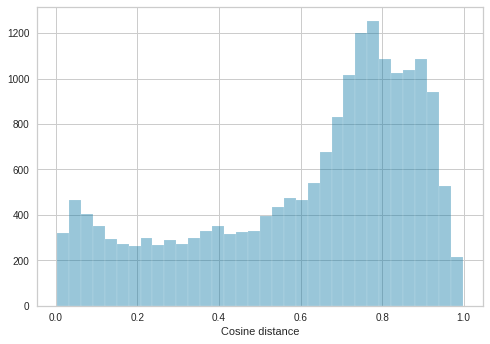

In [67]:
distlist = []
for key in distances:
    distlist.append(distances[key])
distlist = np.concatenate(distlist).flatten()
sns.distplot(distlist, kde=False)
plt.xlabel("Cosine distance")

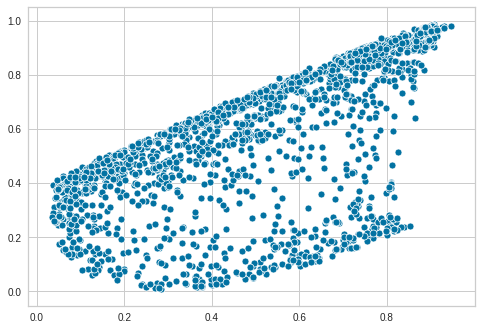

In [114]:
sns.scatterplot(distances['genre9'], distances['genre8'])

In [ ]:
#### years = [2019,2018,2017,2016,2015,2014]
nnoms = [1800,1534,2078,3695,2122,1923]
nvotes = [3097,2828,3319,3130,5950,3587]

Text(0.5, 0, 'Year')

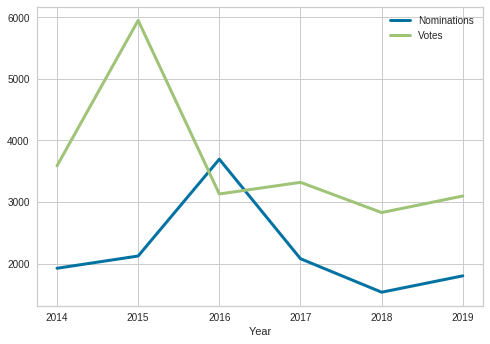

In [82]:
sns.lineplot(years, nnoms, label='Nominations', lw=3)
sns.lineplot(years, nvotes, label='Votes', lw=3)
#plt.legend()
plt.xlabel("Year")